In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from konlpy.tag import Okt
from collections import Counter

In [2]:

df=pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/nsmc.txt", sep="\t")

df['word_count'] = df['document'].apply(lambda x: len(str(x).split()))
df_sorted = df.sort_values(by='word_count', ascending=False).reset_index(drop=True)

df=df_sorted[:5000].copy()
df.head()

,id,document,label,word_count
0,6928782,민좆 파쇼 쌕기들이 종교랑 같이 까는 수준 좀 보솤ㅋㅋㅋㅋㅋ 암 그라제! 우덜이 미...,0,41
1,9614878,나 진짜 웬만해선 다 재밌게 보는 편인데 진짜 보는 내내 언제 끝나나 개답답했다. ...,0,40
2,8330404,정유미 정준영 부부&막둥이 부부 땜 에 봐요 윤한부부 나오면 바로 다른 채널로 사상...,0,40
3,8153927,황당한 소재 및 전개. 쓰레기같은 스토리. 그 수준을 초월한 CG. 정말 어느 것 ...,0,40
4,8525988,EQ 측정용 영화임. 별 2개 - 당신은 마음이 아직 여린 편. 별 3개 - 남에게...,0,40


In [3]:
df.replace("", float("NaN"), inplace=True)
df = df.dropna().reset_index(drop=True)
print('결측치 처리 이후:',len(df))

df = df.drop_duplicates(['document']).reset_index(drop=True)
print('중복 제거 이후:',len(df))

df['document'] = df['document'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
print('한글 아닌 문자 제거 이후:',len(df))

df['document'] = df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
print('리뷰 길이가 짧은 것 제거 :',len(df))

df.head()

결측치 처리 이후: 5000
중복 제거 이후: 4997
한글 아닌 문자 제거 이후: 4997
리뷰 길이가 짧은 것 제거 : 4997


,id,document,label,word_count
0,6928782,쌕기들이 종교랑 보솤ㅋㅋㅋㅋㅋ 그라제 우덜이 미군이 써보지도 완전히 전쟁도 있었당께...,0,41
1,9614878,웬만해선 재밌게 편인데 끝나나 개답답했다 그래도 지나면 재밌겠지 했는데 시나리오가 ...,0,40
2,8330404,정유미 정준영 부부막둥이 윤한부부 나오면 채널로 최초로 부부가 재미없음 막둥이 윤한...,0,40
3,8153927,황당한 쓰레기같은 스토리 수준을 초월한 칭찬해 차라리 디워는 나와서 신기하기라도 도...,0,40
4,8525988,측정용 영화임 당신은 마음이 남에게 상처를 못하는 당신은 인문학예술은 당신의 분야가...,0,40


In [4]:

okt = Okt()
def token_count(text):
    tokens = okt.morphs(text, stem=True)
    return len(tokens)

# 토큰 개수가 3개 이상인 문장만 남김
df = df[df['document'].apply(lambda x: token_count(x) >= 3)].reset_index(drop=True)
print("짧은 문장 제거 후:", len(df))

짧은 문장 제거 후: 4997


In [5]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', 
             '자', '에', '와', '한', '을', '적', '로', '인', '만', '다', '못', '고', '안','것','나','그' ]

def clean_tokenize(text):
    tokens = okt.morphs(text, stem=True)
    return [word for word in tokens if word not in stopwords]

df['tokens'] = df['document'].apply(clean_tokenize)
print(df['tokens'].head())


0    [쌕기, 종교, 랑, 보솤, ㅋㅋㅋㅋㅋ, 라, 제, 우, 덜, 미군, 써다, 보지,...
1    [웬만하다, 선, 재밌다, 편, 인데, 끝나다, 개, 답답하다, 그래도, 지나다, ...
2    [정유미, 정준영, 부부, 막둥이, 윤한, 부부, 나오다, 채널, 최초, 부부, 재...
3    [황당하다, 쓰레기, 같다, 스토리, 수준, 초월, 칭찬, 차라리, 디워, 나오다,...
4    [측정, 용, 영화, 임, 당신, 마음, 남, 에게, 상처, 당신, 인문학, 예술,...
Name: tokens, dtype: object


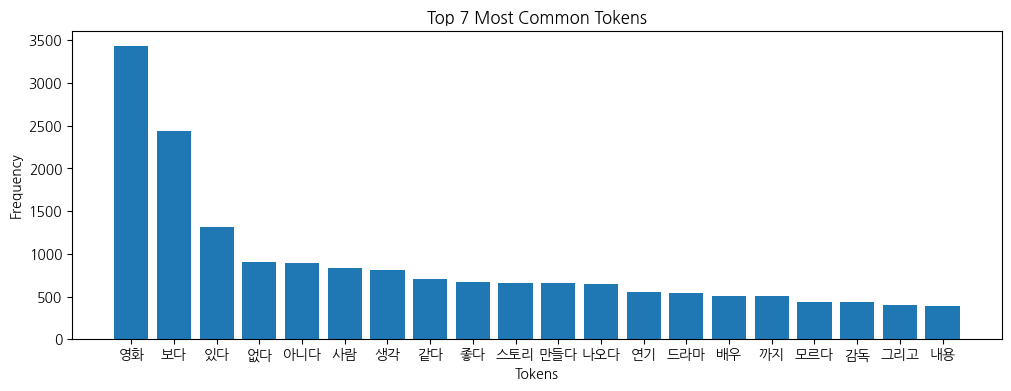

In [6]:
df_samples=df['tokens']
all_tokens = [token for tokens in df_samples for token in tokens]

counter = Counter(all_tokens)
common_words = counter.most_common(20) 
words, freqs = zip(*common_words)

plt.figure(figsize=(12,4))
plt.bar(words, freqs)
plt.title("Top 7 Most Common Tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()


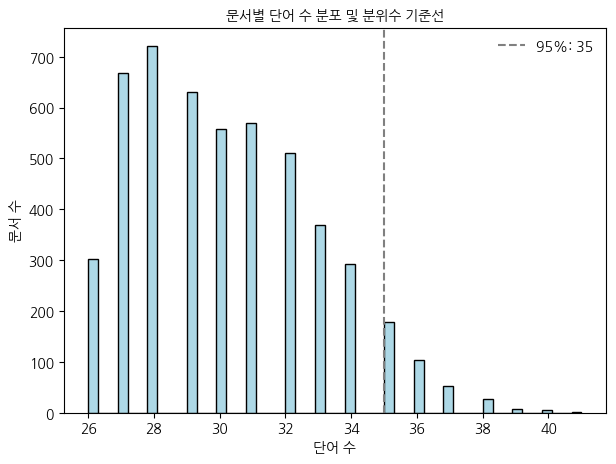

In [7]:

## 패딩을 위한 95% 분위값 출력
q95= df['word_count'].quantile([0.95])

plt.figure(figsize=(7, 5))
plt.hist(df['word_count'], bins=50, color='lightblue', edgecolor='black')


plt.axvline(x=q95.iloc[0], color='gray', linestyle='--', label=f'95%: {int(q95.iloc[0])}')
plt.title('문서별 단어 수 분포 및 분위수 기준선', fontsize=10)
plt.xlabel('단어 수', fontsize=10)
plt.ylabel('문서 수', fontsize=10)
plt.legend(frameon=False,fontsize=10)
plt.grid(False)
plt.show()